# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_schnecken_muscheln.csv")

In [3]:
df.head()

,FAMILY,Scientific name,Deutscher Name,Kat.,IUCN-Kriterien,Bemerkungen
0,Landschnecken,Acicula lineolata,Gekritzte Nadelschnecke,EN,"B2a, B2b(iv)","Wälder, Siedlungsgebiete, Felsen und Steinschutt"
1,Landschnecken,Alinda biplicata,Gemeine Schliessmundschnecke,EN,"B2a, B2b(iv)",Wälder
2,Landschnecken,Argna ferrari,Ferraris Puppenschnecke,VU,"B1,B2b2(ii)","Wälder, Siedlungsgebiete, Felsen und Steinschutt"
3,Landschnecken,Arion intermedius Normand,Kleine Wegschnecke,VU,"B2a, B2b(i-v)",Wälder
4,Landschnecken,Arion rufus,Rote Wegschnecke,VU,B2b(iv),Wälder


In [4]:
len (df)

140

In [5]:
df.pop("IUCN-Kriterien")

0                      B2a, B2b(iv)
1                      B2a, B2b(iv)
2                       B1,B2b2(ii)
3                     B2a, B2b(i-v)
4                           B2b(iv)
5             B2a, B2b(iv), B2c(iv)
6                           B2b(iv)
7                           B2b(iv)
8                      B2a, B2b(iv)
9              B2a, B2b(i, iii, iv)
10                     B2a, B2b(iv)
11                      B2a, C2a(i)
12                     B2a, B2b(iv)
13         B2a, B2b(i, ii, iii, iv)
14                      B1, B2b(iv)
15                     B2a, B2b(iv)
16     B1a, B2a, B2b(i, ii, iii, v)
17                     B2a, B2b(iv)
18                    B2a, B2b(iii)
19             B2a, B2b(i, iii, iv)
20                     B2a, B2b(iv)
21                               B2
22                               B2
23                     B2b(iii, iv)
24                     B2a, B2b(iv)
25                     B2a, B2b(iv)
26                     B2a, B2b(iv)
27                          

In [6]:
df.rename(columns={"Family":"family", "Scientific name": "sc name", "Deutscher Name": "dt name", "Kat.":"cat", "Bemerkungen":"bemerkungen"},inplace=True)

In [7]:
df.head(2)

,FAMILY,sc name,dt name,cat,bemerkungen
0,Landschnecken,Acicula lineolata,Gekritzte Nadelschnecke,EN,"Wälder, Siedlungsgebiete, Felsen und Steinschutt"
1,Landschnecken,Alinda biplicata,Gemeine Schliessmundschnecke,EN,Wälder


In [8]:
df["cat"].value_counts()

EN    40
NT    40
VU    38
CR    19
RE     3
Name: cat, dtype: int64

In [9]:
df['einteilung'] = 'Weichtiere'
df['Untergruppe'] = 'Schnecken,Muscheln'

In [10]:
df.head(2)

,FAMILY,sc name,dt name,cat,bemerkungen,einteilung,Untergruppe
0,Landschnecken,Acicula lineolata,Gekritzte Nadelschnecke,EN,"Wälder, Siedlungsgebiete, Felsen und Steinschutt",Weichtiere,"Schnecken,Muscheln"
1,Landschnecken,Alinda biplicata,Gemeine Schliessmundschnecke,EN,Wälder,Weichtiere,"Schnecken,Muscheln"


In [11]:
liste = df.head(210)

In [12]:
path = "Weichtiere_neu.csv"

liste.to_csv(path, index=True)

In [13]:
df2 = pd.read_csv("01_source/tabula_ch/Weichtiere_neu_b.csv")

In [14]:
df2.head()

,family,sc name,dt name,cat,bemerkungen,einteilung,Untergruppe
0,Landschnecken,Acicula lineolata,Gekritzte Nadelschnecke,EN,"Wälder, Siedlungsgebiete, Felsen und Steinschutt",Weichtiere,Landschnecken
1,Landschnecken,Alinda biplicata,Gemeine Schliessmundschnecke,EN,Wälder,Weichtiere,Landschnecken
2,Landschnecken,Argna ferrari,Ferraris Puppenschnecke,VU,"Wälder, Siedlungsgebiete, Felsen und Steinschutt",Weichtiere,Landschnecken
3,Landschnecken,Arion intermedius Normand,Kleine Wegschnecke,VU,Wälder,Weichtiere,Landschnecken
4,Landschnecken,Arion rufus,Rote Wegschnecke,VU,Wälder,Weichtiere,Landschnecken


In [15]:
df2.groupby("Untergruppe")["cat"].value_counts()

Untergruppe      cat
Landschnecken    NT     29
                 EN     28
                 VU     25
                 CR     17
                 RE      1
Muscheln         EN      5
                 NT      4
                 VU      4
                 CR      1
                 RE      1
Wasserschnecken  VU      9
                 EN      7
                 NT      7
                 CR      1
                 RE      1
Name: cat, dtype: int64

In [16]:
df2["cat"].value_counts()

EN    40
NT    40
VU    38
CR    19
RE     3
Name: cat, dtype: int64

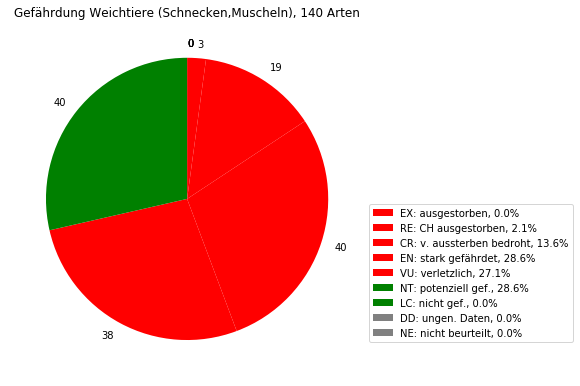

In [18]:
values = [0, 3, 19, 40, 38, 40, 0, 0, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Weichtiere (Schnecken,Muscheln), 140 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

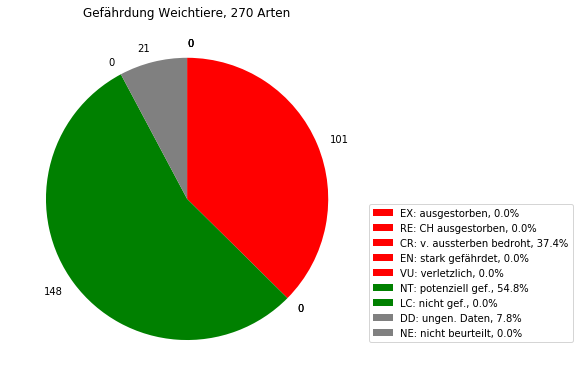

In [21]:
values = [0, 0, 101, 0, 0, 148, 0, 21, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Weichtiere, 270 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

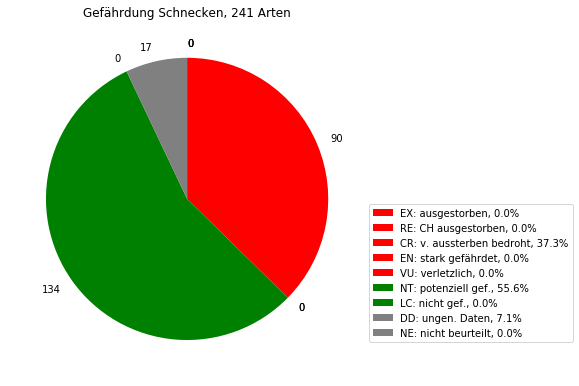

In [17]:
values = [0, 0, 90, 0, 0, 134, 0, 17, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Schnecken, 241 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

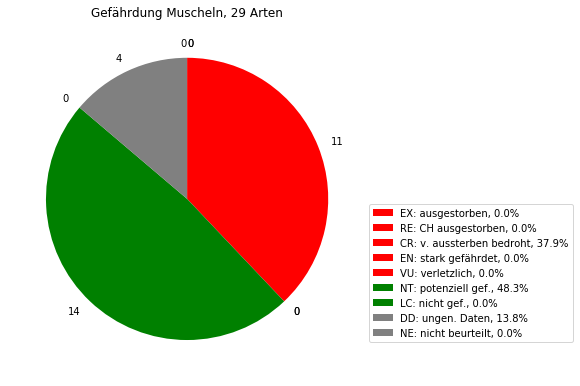

In [18]:
values = [0, 0, 11, 0, 0, 14, 0, 4, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Muscheln, 29 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()